# Prediction of buldozer prices based on Time Series Data
## 1. Problem Definition
to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.
## 2. Data
Data is available on Kaggle :- [BlueBook for bulldozers](https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview)
## 3. Evaluation
The evaluation metric is the RMSLE (root mean squared log error) between the actual and predicted auction prices.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Data/TrainAndValid.csv",low_memory = False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
df.dtypes    

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

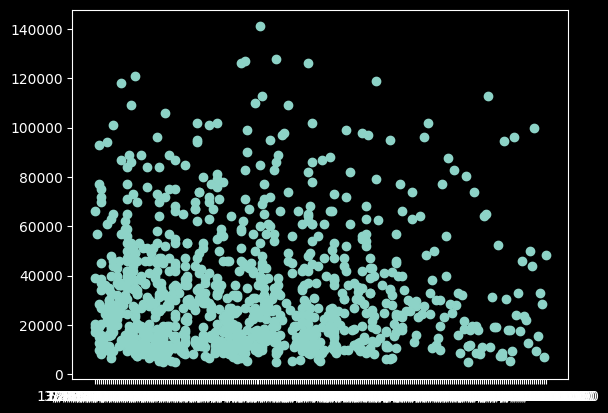

In [8]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

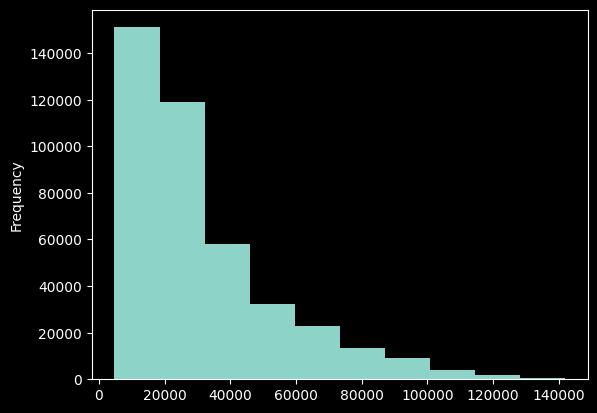

In [9]:
df.SalePrice.plot.hist()

### Parsing Dates
When we are working with Time Series Data, we might wanna enrich the time and date component as much as possible.

We can do that by telling pandas which of our columns have date in it using `parse_dates` parameter

In [10]:
# impor data again, but with parse_date 
df = pd.read_csv("./data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [11]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [12]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

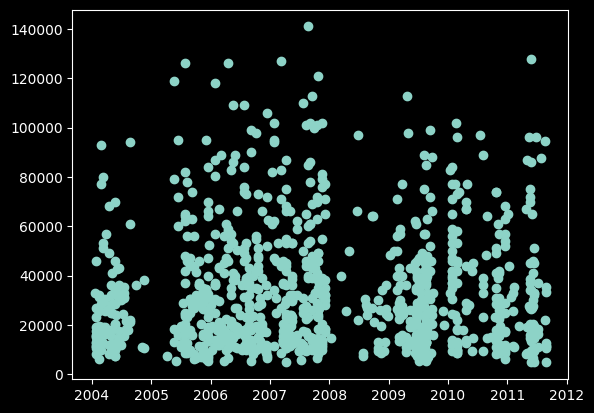

In [13]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [16]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort Data by SaleDate
when it's a time series data, it is advised to sort the data with respect to the dates.

In [17]:
### sort data by saledate
df.sort_values(by=['saledate'],inplace=True,ascending=True)

In [18]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of original DataFrame
we make a copy of the original dataframe, so that when we manipulate the copy, we have still got our original data 

In [19]:
df_tmp = df.copy()

### Add datetime parameter for `saledate` column 

In [20]:
df_tmp['saleyear'] = df_tmp['saledate'].dt.year
df_tmp['salemonth'] = df_tmp['saledate'].dt.month
df_tmp['saleday'] = df_tmp['saledate'].dt.day
df_tmp['saledayofweek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saledayofyear'] = df_tmp['saledate'].dt.dayofyear

In [21]:
df_tmp.head(10).T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356
datasource,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [22]:
# Now since we have enriched our DF with datetime features, we can remove `saledate`
df_tmp.drop('saledate',axis=1,inplace=True)

In [23]:
df_tmp['state'].value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [24]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

### Convert strings into Pandas Categories
One way to turn our data into numbers is by converting them into Pandas Categories

In [25]:
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

In [26]:
for label,content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [27]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [28]:
# this will turn all string values into categorical values
for label,content in df_tmp.items():
    if pd.api.types.is_object_dtype(content) or pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [29]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [31]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas categories, we now have a way to acces all of our data in form of numbers

But we still have a lot of missing data. . .

In [32]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save Preprocessed data

In [33]:
# export current tmp dataframe
df_tmp.to_csv("./Data/train_tmp.csv",index=False)

## Fill Missing Data
#### Fill Numeric missing Data

In [34]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [35]:
# check which numeric column have null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label)

auctioneerID
MachineHoursCurrentMeter


In [36]:
# Fill numeric rows with median
# check which numeric column have null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        # Add a binary column which tells us if the data was missing there or not
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # Fill missing numeric value with median
        df_tmp[label] = content.fillna(content.median())

In [37]:
# check which numeric column have null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label)

In [38]:
# check to see how many values were missing
df_tmp['auctioneerID_is_missing'].value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

### Filling Categorical missing data

In [39]:
# check for labels which are categorical and have some missing values
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [40]:
# turn categorical variables into numbers and fill missing values
# check for labels which are categorical and have some missing values
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # Turn category into numbers and add 1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [41]:
# check for labels which are categorical and have some missing values
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label)

In [42]:
# check for labels which are categorical and not have some missing values
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes + 1

In [43]:
# check for labels which are categorical and have some missing values
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [44]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 97 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   SalesID                              412698 non-null  int64  
 1   SalePrice                            412698 non-null  float64
 2   MachineID                            412698 non-null  int64  
 3   ModelID                              412698 non-null  int64  
 4   datasource                           412698 non-null  int64  
 5   auctioneerID                         412698 non-null  float64
 6   YearMade                             412698 non-null  int64  
 7   MachineHoursCurrentMeter             412698 non-null  float64
 8   UsageBand                            412698 non-null  int8   
 9   fiModelDesc                          412698 non-null  int16  
 10  fiBaseModel                          412698 non-null  int16  
 11  fiSecondaryDe

In [45]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 97, dtype: int64

## Modelling
We have done enough EDA, let's do somne model driven EDA.

In [46]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
%%time
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000) # for final call remove max samples param, this has been added to reduce the training time
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

CPU times: total: 1min 33s
Wall time: 7.49 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [49]:
model.score(df_tmp.drop("SalePrice",axis=1),df["SalePrice"])

0.8605535759708257

### Splitting data into Training and Validation Dataset

In [50]:
df_tmp.saleyear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleyear, Length: 412698, dtype: int32

In [51]:
df_tmp.saleyear.value_counts()

saleyear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [52]:
df_valid = df_tmp[df_tmp.saleyear == 2012]
df_train = df_tmp[df_tmp.saleyear != 2012]

len(df_valid),len(df_train)

(11573, 401125)

In [53]:
# Split Data into X and y
X_train,y_train = df_train.drop('SalePrice',axis=1),df_train['SalePrice']
X_valid,y_valid = df_valid.drop('SalePrice',axis=1),df_valid['SalePrice']

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 96), (401125,), (11573, 96), (11573,))

In [54]:
# Takes too much time
# %%time
# model = RandomForestRegressor(n_jobs=-1,random_state=42)
# model.fit(X_train,y_train)

### Building an evaluation Function

In [55]:
# Create an evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_test,y_preds):
    """
    Calculate Root Mean Squared Log Error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
# Create function to evaluate model on different levels
def show_score(model,X_train,Y_train,X_valid,Y_valid):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {
        'Training MAE':mean_absolute_error(Y_train,train_preds),
        'Validation MAE':mean_absolute_error(Y_valid,valid_preds),
        'Training R2':r2_score(Y_train,train_preds),
        'Validation R2':r2_score(Y_valid,valid_preds),
        'Training RMSLE':rmsle(Y_train,train_preds),
        'Validation RMSLE':rmsle(Y_valid,valid_preds)
    }
    return scores

In [56]:
show_score(model,X_train,y_train,X_valid,y_valid)

{'Training MAE': 5562.881462167655,
 'Validation MAE': 6732.787572971571,
 'Training R2': 0.860739404982177,
 'Validation R2': 0.8522315043300446,
 'Training RMSLE': 0.2577296199052973,
 'Validation RMSLE': 0.2798065951661556}

## Testing our model on a subset (To tune the HyperParameters)

In [57]:
%%time
# Cutting down on the max number of samples that each estimator can see, improves the training time
# change max_samples values
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model.fit(X_train,y_train)

CPU times: total: 1min 35s
Wall time: 7.83 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [58]:
show_score(model,X_train,y_train,X_valid,y_valid)

{'Training MAE': 5561.513057924589,
 'Validation MAE': 7155.632784930442,
 'Training R2': 0.860722898583499,
 'Validation R2': 0.832588403039663,
 'Training RMSLE': 0.2578005599357549,
 'Validation RMSLE': 0.29223097494391737}

## HyperParameter Tuning with RandomizedSearchCV

In [59]:
%%time
from sklearn.model_selection import RandomizedSearchCV

grid = {
    'n_estimators':np.arange(10,100,10),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2),
    'max_features':[0.5,1,'sqrt',None],
    'max_samples':[10000]
}

rs_model = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1,random_state=42),
    param_distributions = grid,
    n_iter = 100,
    cv = 5,
    verbose = True
)

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 9min 50s
Wall time: 29min 19s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt', None],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [60]:
# Evaluate rs_model
show_score(rs_model,X_train,y_train,X_valid,y_valid)

{'Training MAE': 5655.091354374972,
 'Validation MAE': 7257.001101307488,
 'Training R2': 0.8555354391711505,
 'Validation R2': 0.8272508229033874,
 'Training RMSLE': 0.26100421358058873,
 'Validation RMSLE': 0.29582148613485726}

## Train the model with best HyperParameters
**Note** These were found after 100 itereations of `RandomisedSearchCV`

In [64]:
ideal_params = rs_model.best_params_
ideal_params.pop('max_samples')
ideal_params

{'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None}

In [66]:
%%time
# most ideal hyperparameters
ideal_model = RandomForestRegressor(
    n_jobs = -1,
    random_state = 42,
    **ideal_params
)
# Fit the ideal model
ideal_model.fit(X_train,y_train)

CPU times: total: 30min 24s
Wall time: 2min 57s


RandomForestRegressor(max_features=None, min_samples_split=8, n_estimators=80,
                      n_jobs=-1, random_state=42)

In [67]:
ideal_model.score(X_valid,y_valid)

0.8733156802720894

In [68]:
# scores of our ideal_model which is trained only on all data
show_score(ideal_model,X_train=X_train,X_valid=X_valid,Y_train=y_train,Y_valid=y_valid)

{'Training MAE': 2249.6593183882956,
 'Validation MAE': 6109.784498741202,
 'Training R2': 0.9746449758041971,
 'Validation R2': 0.8733156802720894,
 'Training RMSLE': 0.11527869325613761,
 'Validation RMSLE': 0.2542515335745712}

In [70]:
# scores of our rs_model which is trained only on 10k samples
show_score(rs_model,X_train=X_train,X_valid=X_valid,Y_train=y_train,Y_valid=y_valid)

{'Training MAE': 5655.091354374972,
 'Validation MAE': 7257.001101307488,
 'Training R2': 0.8555354391711505,
 'Validation R2': 0.8272508229033874,
 'Training RMSLE': 0.26100421358058873,
 'Validation RMSLE': 0.29582148613485726}

In [71]:
test_df = pd.read_csv('./Data/Test.csv',low_memory=False,parse_dates=['saledate'])
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


**Note** Before we try to make predictions on the test data, we need to process the data so that it fits into the format of the data that model has been trained for

In [72]:
test_df.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [74]:
test_df.shape

(12457, 52)

In [75]:
X_train.shape

(401125, 96)

## Preprocessing the data
i.e getting the test dateset in the same format as training dataset

In [76]:
def preprocess_data(df):
    '''
    Performs transformations on df and returns transformed df
    '''
    # preprocessing related to saledate column
    df = df.copy()
    df['saleyear'] = df['saledate'].dt.year
    df['salemonth'] = df['saledate'].dt.month
    df['saleday'] = df['saledate'].dt.day
    df['saledayofweek'] = df['saledate'].dt.dayofweek
    df['saledayofyear'] = df['saledate'].dt.dayofyear
    df.drop('saledate',axis=1,inplace=True)
    for label,content in df.items():
        # Filling numeric missing data with median
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing there or not
                df[label+'_is_missing'] = pd.isnull(content)
                # Fill missing numeric value with median
                df[label] = content.fillna(content.median())
        elif not pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+'_is_missing'] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes + 1
    # # Converting String and object data to numerical/categorical data 
    # for label,content in df.items():
    #     if pd.api.types.is_object_dtype(content) or pd.api.types.is_string_dtype(content):
    #         df[label] = content.astype('category').cat.as_ordered()
    # # Filling Categorical missing data
    # for label,content in df.items():
    #     if not pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
    #         # Turn category into numbers and add 1
    #         df[label] = pd.Categorical(content).codes + 1
    # # check for labels which are categorical and have some missing values
    # for label,content in df.items():
    #     if pd.api.types.is_string_dtype(content):
    #         df[label] = pd.Categorical(content).codes + 1
    return df


In [77]:
test_df_transformed = preprocess_data(test_df)

In [78]:
for label,content in test_df_transformed.items():
        if pd.api.types.is_object_dtype(content) or pd.api.types.is_string_dtype(content):
            print(label)

In [79]:
set(X_train.columns)-set(test_df_transformed.columns)

{'auctioneerID_is_missing'}

In [80]:
# test_df_transformed['auctioneerID_is_missing'] = False
test_df_transformed.insert(X_train.columns.get_loc('auctioneerID_is_missing'),"auctioneerID_is_missing",False)

since we have no. of columns in test data = no. of columns our model is trained on, we can make predictions now

In [81]:
test_preds = ideal_model.predict(test_df_transformed)
test_preds

array([12154.47390197, 43720.39794407, 44979.6973079 , ...,
       15081.70472756, 15081.70472756, 21825.58351575])

### Format predictions, as asked in kaggle

In [82]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = test_df['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,12154.473902
1,1227844,43720.397944
2,1227847,44979.697308
3,1227848,42902.407124
4,1227863,18896.598934
...,...,...
12452,6643171,24640.881403
12453,6643173,24549.642857
12454,6643184,15081.704728
12455,6643186,15081.704728


In [83]:
y_test_df = pd.read_csv('./Data/random_forest_benchmark_test.csv')
y_test_df

,SalesID,SalePrice
0,1227829,13630.0
1,1227844,32530.0
2,1227847,48660.0
3,1227848,96080.0
4,1227863,27440.0
...,...,...
12452,6643171,59080.0
12453,6643173,10165.0
12454,6643184,11125.0
12455,6643186,13720.0


In [84]:
def show_score_test(y_test,y_preds):
    scores = {
        'Test MAE':mean_absolute_error(y_test,y_preds),
        'Test R2':r2_score(y_test,y_preds),
        'Test RMSLE':rmsle(y_test,y_preds)
    }
    return scores

In [85]:
show_score_test(y_test_df['SalePrice'],test_preds)

{'Test MAE': 14621.606917823428,
 'Test R2': 0.16000089740607082,
 'Test RMSLE': 0.5903153467304615}

## Feature Importance
it seeks to figure out, which different attributes of the data were the most important when it comes to predicting the **target variable**

In [86]:
ideal_model.feature_importances_

array([4.84138235e-02, 1.43784776e-02, 3.25012143e-02, 2.66316261e-04,
       3.79543199e-03, 2.66094023e-01, 2.89722375e-03, 9.45945399e-04,
       2.00489419e-02, 7.99222068e-02, 5.23706513e-02, 4.35313272e-03,
       3.41070014e-03, 2.31770989e-01, 4.06253111e-02, 7.60450817e-03,
       2.00924212e-04, 1.70074779e-04, 1.71858143e-03, 8.55466428e-03,
       3.43736275e-04, 3.26030254e-05, 4.99864905e-04, 1.71367583e-04,
       1.53733367e-03, 2.56042016e-05, 2.29766730e-04, 6.26240345e-03,
       1.35109101e-04, 2.40423039e-04, 2.84487004e-03, 2.87567146e-03,
       2.18184568e-03, 3.81708925e-03, 7.97808896e-04, 1.48831787e-03,
       8.22245093e-04, 1.72194471e-02, 4.99339923e-06, 6.20643633e-06,
       1.54051791e-04, 1.00044482e-03, 1.13802842e-03, 6.59398228e-04,
       2.07789541e-04, 3.93408194e-04, 2.47945732e-04, 1.51211920e-03,
       8.68086568e-04, 1.56135535e-04, 2.11794763e-04, 7.70042401e-02,
       2.39583226e-03, 7.62992388e-03, 3.62870370e-03, 1.34271001e-02,
      

In [87]:
# Plotting feature importances
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({"features":columns,'feature importances':importances})
            .sort_values("feature importances",ascending=False)
            .reset_index(drop=True))
    # Plot the subplots
    fig,ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature importances'][:n])
    ax.set_xlabel(["feature importances"])
    ax.set_ylabel(["features"])
    ax.invert_yaxis()

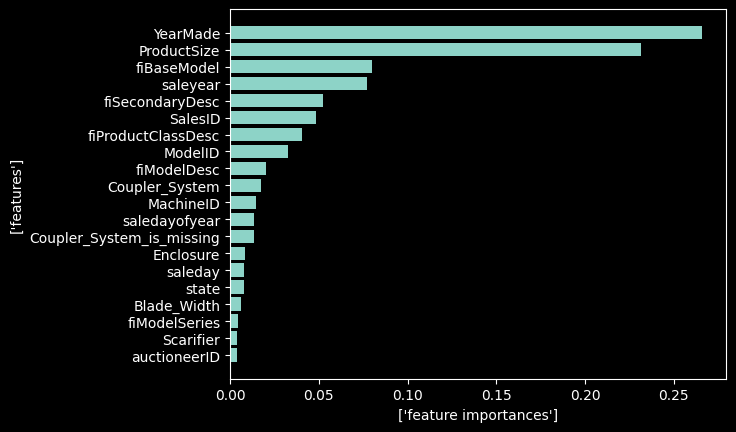

In [88]:
plot_features(X_train.columns,ideal_model.feature_importances_)

# saving the model

In [89]:
from joblib import load,dump
dump(ideal_model,'./Model/Ideal_Model_Bulldozer.joblib')

['./Model/Ideal_Model_Bulldozer.joblib']